# Telecom Customer Churn

For this module examination, I would use data from Kaggle regarding Customer Churn Rate.

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<b> Coloumns Descriptions  </b>
- customerID = Customer ID
- gender = Whether the customer is a male or a female
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)

In this exam, the maximum point is 100 with the criterion is shown below:
- The Coding Part would yield the maximum point of 30
- 5 Question with score of:
    - Q1 : 5 Point
    - Q2 : 5 Point
    - Q3 : 10 Point
    - Q4 : 5 Point
    - Q5 : 45 Point

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('Churn_ujian.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.describe(exclude = 'number').T

,count,unique,top,freq
customerID,7043,7043,9274-UARKJ,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [10]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum())/len(df[col])), 
                    df[col].nunique(), list(df[col].drop_duplicates().sample().values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,[9091-WTUUY]
1,gender,object,0,0.0,2,[Female]
2,SeniorCitizen,int64,0,0.0,2,[1]
3,Partner,object,0,0.0,2,[No]
4,Dependents,object,0,0.0,2,[No]
5,tenure,int64,0,0.0,73,[25]
6,PhoneService,object,0,0.0,2,[Yes]
7,MultipleLines,object,0,0.0,3,[No]
8,InternetService,object,0,0.0,3,[No]
9,OnlineSecurity,object,0,0.0,3,[Yes]


We have no missing value, but as we can see the column TotalCharges have an object data type but when we sampled it they had some numerical value. Let's try to convert this column data type to float

It seems there is some string data that could not be converted to float, Let's try to find the row that is problematic

In [11]:
# df['TotalCharges'] = df['TotalCharges'].astype('float')
string_tc = []
for i in range(len(df)):
    try:
        df['TotalCharges'][i] == float(df['TotalCharges'][i])
    except:
        string_tc.append(i)

In [12]:
df.iloc[string_tc,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 datas with string space character at the TotalCharges Column

## Question 1
In your opinion, Why this datas filled with empty String? Is it related with another column?

#### Answer:
* First thing I notice is Total Charges with empty string customers all has 0 months on their tenure with Telecom, so I assume that they're new customer or maybe customer that are changing their subscription plans thus they only start the subscription in which they are not charged yet. 
* Also all Total Charges with empty string customers are all have dependents, but I believe this is just a coincidence because I can't see the correlation between Total Charges and Dependent status.

Try to replace this string value with 0 and convert the Total Charges to the float data type now

In [13]:
for i in string_tc:
    df['TotalCharges'][i] = 0
df['TotalCharges'] = df['TotalCharges'].astype('float')

C:\Users\Nicholas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Check once more the data row that was previously have string value to make sure the data have been replaced by 0

In [14]:
df.iloc[string_tc,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


I find it interesting that some people still pay their bill via mailed check, lets try to filter the dataset to only get the data with Mailed check class from the PaymentMethod feature

In [16]:
mc = df[df['PaymentMethod']=='Mailed check']
mc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No


I am kinda curious, is there any difference between people who have partner or not for people who choose mailed check. Let's try to visualize this by using the countplot. I would also like to create a grid with the Payment Method as the columns to see the difference between each payment method.

In [17]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Mailed Check Payment Method grouped by Partner')

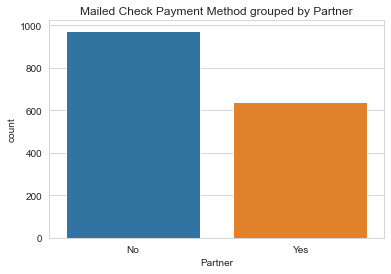

In [18]:
sns.countplot(x = 'Partner', data = mc)
plt.title('Mailed Check Payment Method grouped by Partner')

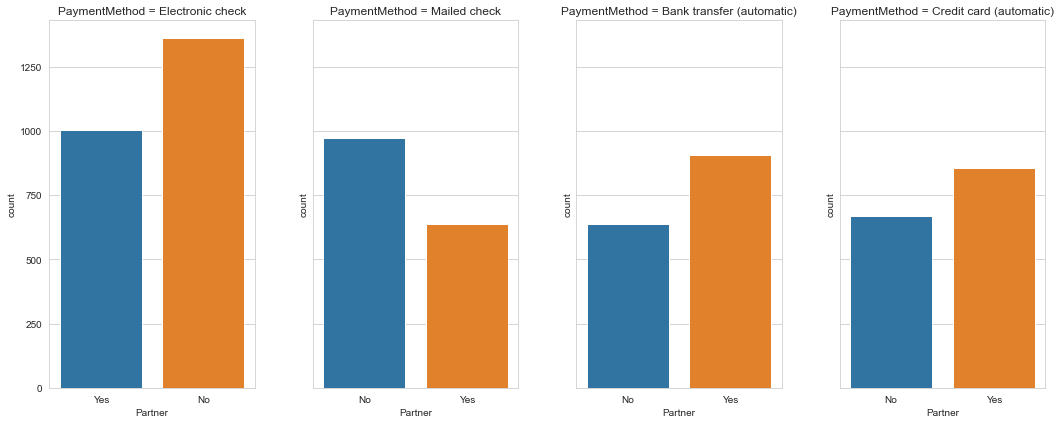

In [19]:
f, axes = plt.subplots(1,4,figsize=(15,6),sharey=True)
sns.countplot(x="Partner", data=df[df['PaymentMethod']=='Electronic check'], ax=axes[0])
axes[0].set_title('PaymentMethod = Electronic check')
sns.countplot(x="Partner", data=df[df['PaymentMethod']=='Mailed check'], ax=axes[1])
axes[1].set_title('PaymentMethod = Mailed check')
sns.countplot(x="Partner", data=df[df['PaymentMethod']=='Bank transfer (automatic)'], ax=axes[2])
axes[2].set_title('PaymentMethod = Bank transfer (automatic)')
sns.countplot(x="Partner", data=df[df['PaymentMethod']=='Credit card (automatic)'], ax=axes[3])
axes[3].set_title('PaymentMethod = Credit card (automatic)')
plt.yticks(np.arange(0,1251,250))
plt.tight_layout()

Seems there is interesting finding that people who paid via Mailed Check are less likely to have partner compared to the other payment method. Let's try to use another feature to find any interesting finding, this time I would use the tenure feature with distribution plot. Just like before, I would create grid with different payment method as the columns.

Text(0.5, 1.0, 'Tenure distribution with Mailed Check Payment Method')

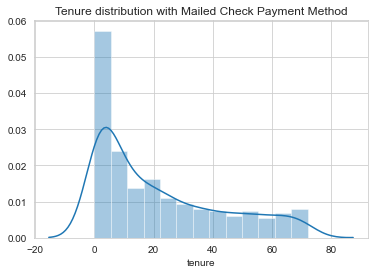

In [20]:
sns.distplot(mc['tenure'])
plt.title('Tenure distribution with Mailed Check Payment Method')

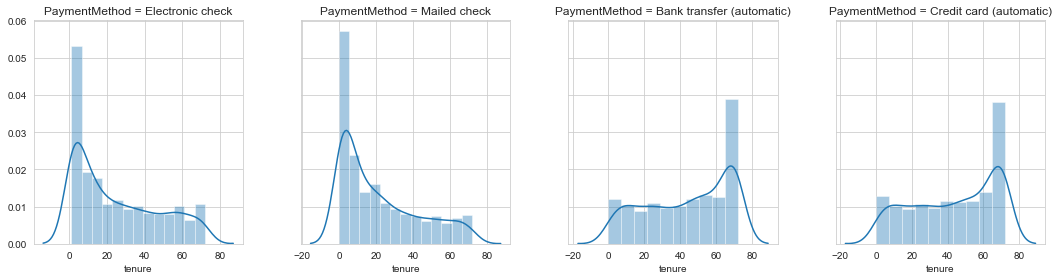

In [21]:
f, axes = plt.subplots(1,4,figsize=(15,4),sharey=True)
sns.distplot(df[df['PaymentMethod']=='Electronic check']['tenure'], ax=axes[0])
axes[0].set_title('PaymentMethod = Electronic check')
sns.distplot(df[df['PaymentMethod']=='Mailed check']['tenure'], ax=axes[1])
axes[1].set_title('PaymentMethod = Mailed check')
sns.distplot(df[df['PaymentMethod']=='Bank transfer (automatic)']['tenure'], ax=axes[2])
axes[2].set_title('PaymentMethod = Bank transfer (automatic)')
sns.distplot(df[df['PaymentMethod']=='Credit card (automatic)']['tenure'], ax=axes[3])
axes[3].set_title('PaymentMethod = Credit card (automatic)')
plt.tight_layout()

## Question 2

From the plot above, what could you conclude about people who paid via mailed check? Also. is there any relationship between the tenure and partner column with the payment method?

#### Answer:
* Customers with mailed check as payment method tends to have shorter tenure compared to bank/credit card payment method.
* It seems that customers not having a partner are usually prefers mailed check payment method
* For some reason customers having a partner prefers electronic or bank/credit-card payment method.
* Also payment method via bank/credit-card usually have longer tenure customers.

The relationship between tenure and having a partner can be summarized into customer that have partner is more likely to churn because of the payment method preferred which are Checks (Electronic and Mailed). Further analysis is needed.

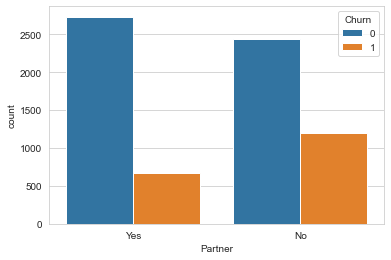

In [177]:
sns.countplot(x='Partner',hue='Churn',data=df)

Look at this plot graph, customers without partner are most likely to churn instead. I think there is no relationship between payment method of customers with partner or not because the likelyhood to churn is bigger for no partner customers.

That is enough EDA between feature, now let's focus to the our target (Churn). First, try to visualize the count of the Churn feature

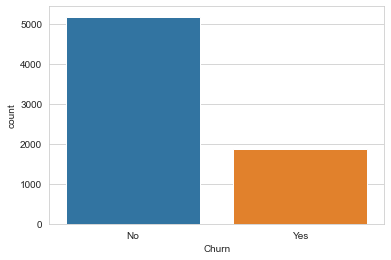

In [22]:
sns.countplot(x='Churn',data= df)

It seems we have a case of imbalanced dataset for churn prediction. Let's try to visualize the distirbution for every category and numerical columns that we have. Before we proceed, replace the SeniorCitizen feature value with 0 as No and 1 as Yes.

*Note: if you use looping for showing all the plot, don't forget to add plt.show() after each iteration*

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [25]:
cat1 = df.describe(exclude = 'number').columns[1:-1]

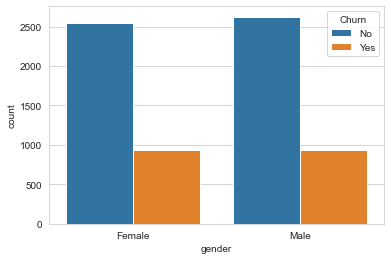

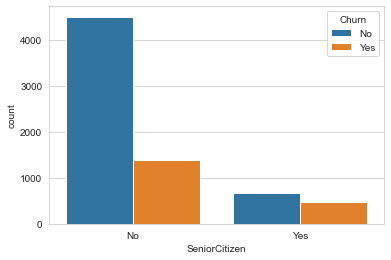

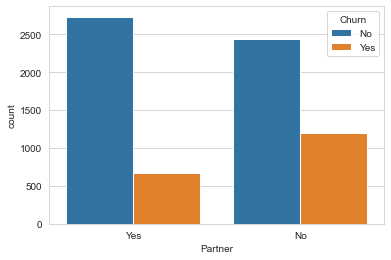

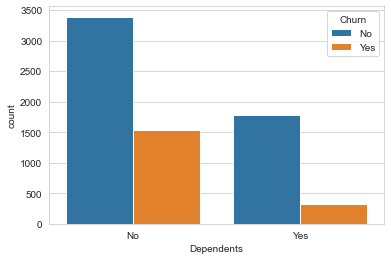

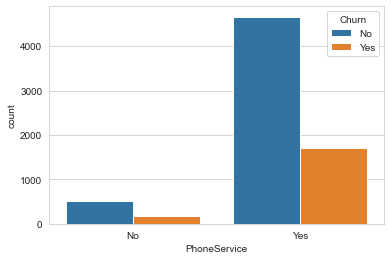

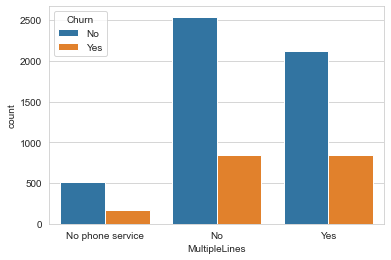

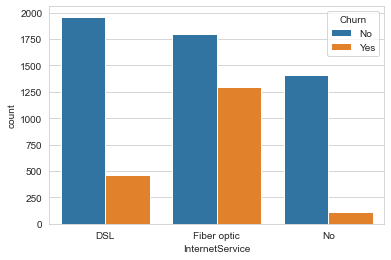

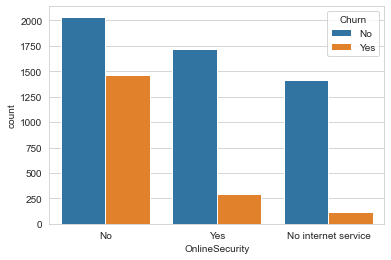

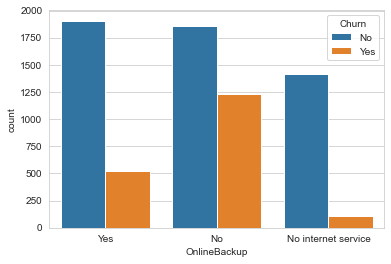

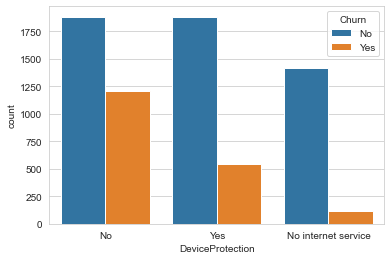

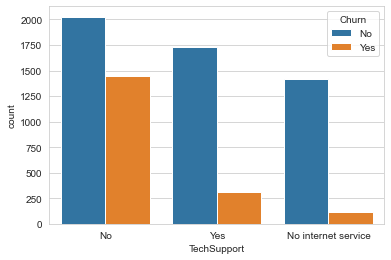

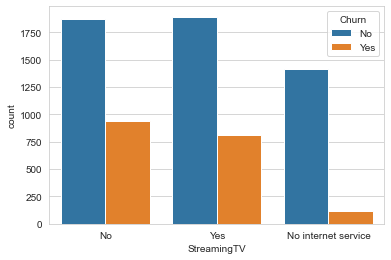

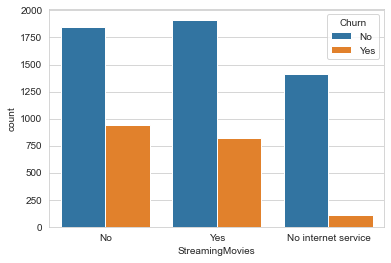

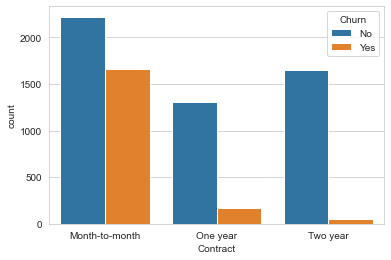

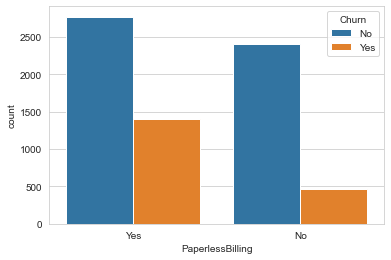

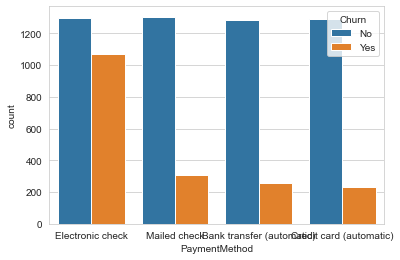

In [26]:
for i in cat1:
    sns.countplot(x=i,hue='Churn',data=df)
    plt.show()

In [27]:
num1 = df.describe().columns
churn_y = df[df['Churn'] == 'Yes']
churn_n = df[df['Churn'] == 'No']

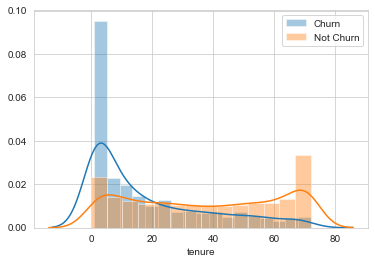

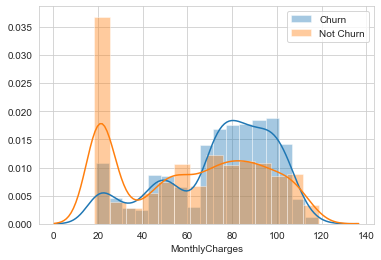

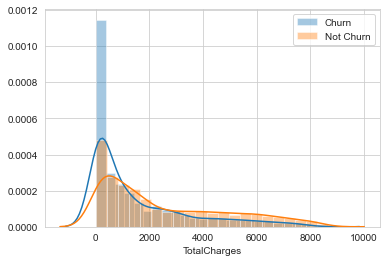

In [28]:
for i in num1:
    sns.distplot(churn_y[i],label='Churn')
    sns.distplot(churn_n[i],label='Not Churn')
    plt.legend()
    plt.show()

## Question 3

Is there any interesting insight that you could find from the plot above?

* One could argue that gender didn't affect customer churn or not churn
* Senior Citizens are more likely churn than not churn, could age affect customers tendencies to churn or not churn? Do Senior Citizes have medical conditions such as Alzheimer or maybe Age-related memory loss? Or maybe senior citizens just tend to be loyal to Telecom? Interesting insight in my opinion.
* One could argue that having partner didn't affect customer churn or not churn
* Data has more non dependent customers than dependent customers, one could argue that dependency didn't affect customer churn or not churn but dependent customers less likely to churn for some reason. Interesting.
* Phone Service is the most sought feature from Telecom, almost half the customers used multiple lines phone service.
* For Internet Service customers, higher number of churn in Fiber Optic category, Telecom must improve the Fiber Optic Internet Service in my opinion. Improvement can be done through surveys to find out which is the problem that caused customers to churn.
* For Online Security, high number of churn from customers that didn't have or ask for Online Security, maybe Telecom can put a package bonus to get free Online Security because I think customers fear the extra charge for Online Security which then lead to churn.
* For Online Backup, high number of churn from customers that didn't have or ask for Online Backup, similar to Online Security maybe Telecom can put a package bonus to get free Online Backup because I think customers fear the extra charge for Online Backup which then lead to churn.
* For Device Protection, high number of churn from customers that didn't have or ask for Device Protection, similar to Online Security & Backup maybe Telecom can put a package bonus to get free Device Protection because I think customers fear the extra charge for Device Protection which then lead to churn.
* For Tech Support, high number of churn from customers that didn't have or ask for Tech Support, similar to Online Security, Backup & Device Protection maybe Telecom can put a package bonus to get free Tech Support because I think customers fear the extra charge for Tech Support which then lead to churn.
* Streaming TV and Streaming Movies seem to not be the reason why customers churn or not
* For Cotracts, high number of churn from customers in month to month contract. I think Telecom should put incentives for customers with one year or more contracts to move the customers from month to month contract into at least one year contract.
* Customers with Paperless billing interestingly more likely to churn. Perhaps improvement that can increase customers satisfaction must be applied for Telecom Paperless billing (better design, friendlier language, etc.)
* For payment method, surprisingly high number of churn for customers with Electronic Check payment method, an improvement is needed (survey to customers).
* For Tenure, customers likely to churn when they're in the earlier months of their tenure. Perhaps Telecom can add incentives and bonus or discounts for customers to extend their tenure and of course done surveys to find out why customers churn early.
* For Monthly Charges, customers with Montly Charges of around USD 65 to USD 110 are more likely to churn. Perhaps price is to expensive?

Now, I think Improvements can be done by Telecom through creation of packages that is economically friendly (cheaper) and have features like Online Protection, Online Backup, Device Protection, and Tech Support given in the packages. The key point in these packages is that the package only available for customers that commit to at least one year contract. I believe this suggestion can reduce customers likelyhood to churn.

As our aim is to use machine learning for prediction, lets prepare our columns to be ready for machine learning activities. First, drop the CustomerID column then change all the category columns into numerical value by using get_dummies (OneHotEncoder) except the target column (Churn). Also, set the drop_first parameter as True.

At the same time, change the Churn feature value with No as 0 and Yes as 1

In [29]:
data = df.drop(['customerID','Churn'],axis=1)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [30]:
dummies = pd.get_dummies(data,drop_first=True)

In [31]:
dummies.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [32]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
gender_Male                              7043 non-null uint8
SeniorCitizen_Yes                        7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_No internet service   

## Unsurpervised Modelling

Before we do any of the supervised modelling, let's do some data mining from our data. Remember, as lot of unsupervised model based on distance means that we need to rescale our data to have a same scale. 

In our case, we would use all the data except the target data for data mining. 

First, use the boxplot to check all the data distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

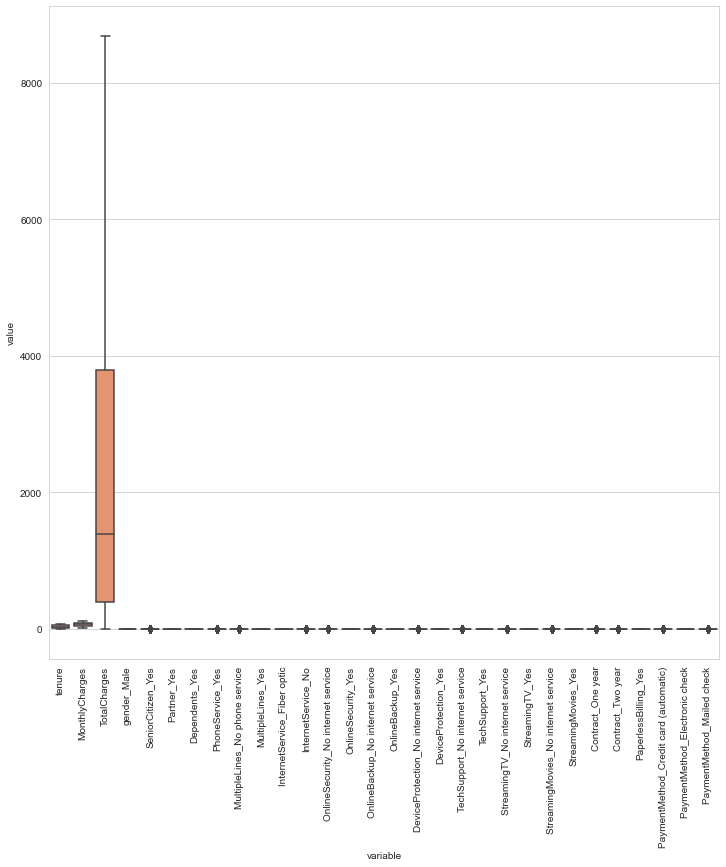

In [33]:
plt.figure(figsize=(12,12))
sns.boxplot(x="variable", y="value", data=pd.melt(dummies))
plt.xticks(rotation=90)

Just from the boxplot, we could see that the scale is not similar. In this case, lets rescale all the data by using the StandardScaler then check the data one more time to know our data distribution

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(dummies), columns = dummies.columns)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

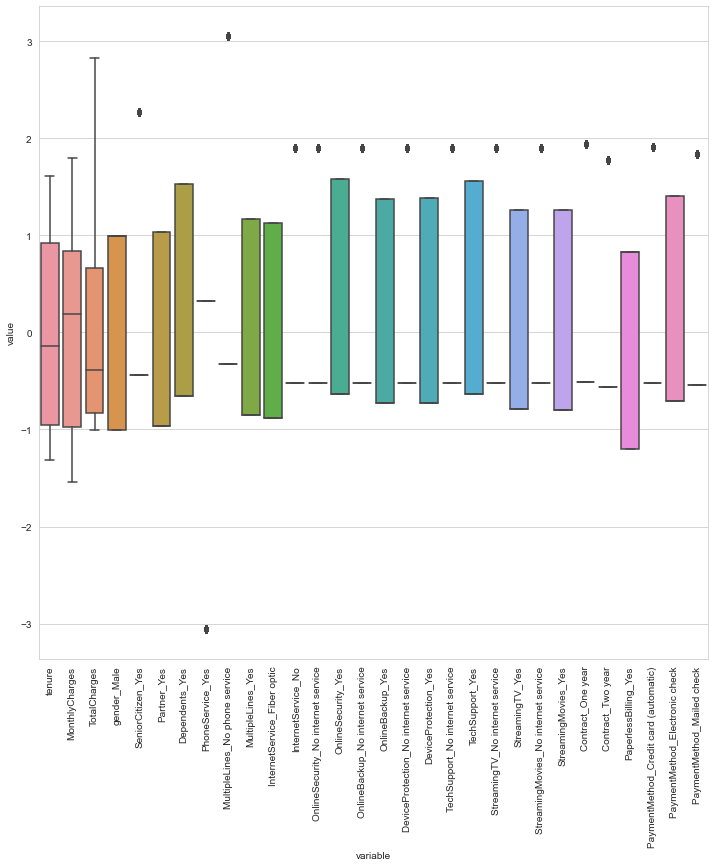

In [35]:
plt.figure(figsize=(12,12))
sns.boxplot(x="variable", y="value", data=pd.melt(scaled))
plt.xticks(rotation=90)

We have lot of feature to be put into our unsupervised model, because of that let's use PCA to reduce our feature to 2 feature with random_state = 101. PC1 and PC2. 

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2,random_state = 101).fit(scaled)

In [37]:
dummies_pca = pca.transform(scaled)

In [38]:
dumpca = pd.DataFrame(dummies_pca,columns=['PC1','PC2'])

In [39]:
dumpca.head()

,PC1,PC2
0,-0.432402,-3.150994
1,-0.204024,-0.794405
2,-0.160382,-2.089736
3,-0.898671,-0.878803
4,-0.613839,-3.175062


In [40]:
pca.explained_variance_ratio_

array([0.33179753, 0.11983851])

Our 2 PC only explained around 45 variance of the data, but we could just work with this data right now. Let's use the scatter plot to see the distribution of the 2 PC with the Churn feature as the hue

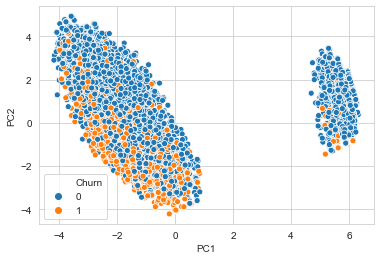

In [41]:
sns.scatterplot(x='PC1',y='PC2',data = dumpca,hue=df['Churn'])

Seems our 2 PC resulting in the 2 different group, it is really interesting as it is not usable for separating our Churn feature but it might end up with another fascinating observation. 

Now, we would use KMeans, DBSCAN, and HDBSCAN to cluster our 2 PC. This time, I already done some analysis and find the best parameter we could use. Try to use the KMeans model with n_cluster = 2, DBSCAN model with eps = 0.4 and min_samples = 2, and HDBSCAN model with min_cluster_size =2 and min_samples = 25

Then create the scatter plot to compare the separation performance of each model. 

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state = 101)
kmeans.fit(dumpca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [43]:
dumkmeans = dumpca.copy()
dumkmeans['Category'] = kmeans.labels_

In [44]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.40, min_samples = 2).fit(dumpca)

In [45]:
dumdbscan = dumpca.copy()
dumdbscan['Category'] = dbscan.labels_

In [46]:
from hdbscan import HDBSCAN
hdbscan = HDBSCAN(min_cluster_size=2, min_samples = 25)
hdbscan.fit(dumpca)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=2, min_samples=25, p=None,
        prediction_data=False)

In [47]:
dumhdbscan = dumpca.copy()
dumhdbscan['Category'] = hdbscan.labels_

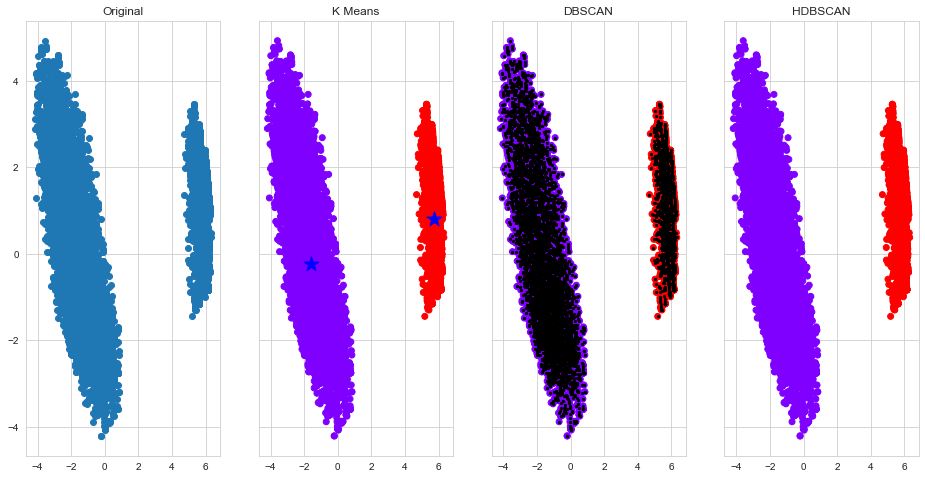

In [48]:
centroids = kmeans.cluster_centers_
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True,figsize=(16,8))

ax1.set_title("Original")
ax1.scatter(dumpca['PC1'], dumpca['PC2'], cmap = 'rainbow')

ax2.set_title('K Means')
ax2.scatter(dumkmeans['PC1'], dumkmeans['PC2'], c =dumkmeans['Category'], cmap = 'rainbow')
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='b', s=250)

core = dbscan.components_
ax3.set_title('DBSCAN')
ax3.scatter(dumdbscan['PC1'], dumdbscan['PC2'], c =dumdbscan['Category'], cmap = 'rainbow')
ax3.scatter(core[:, 0], core[:, 1], marker='o', c='black', s=5)

ax4.set_title('HDBSCAN')
ax4.scatter(dumhdbscan['PC1'], dumhdbscan['PC2'], c =dumhdbscan['Category'], cmap = 'rainbow')

Seems all of our our model resulting in 2 different cluster, just like we expected. Now, return the label from the KMeans model back to the original data and use the pair plot to see the relation between the numerical value with the label as the hue (I am personally name it k-label)

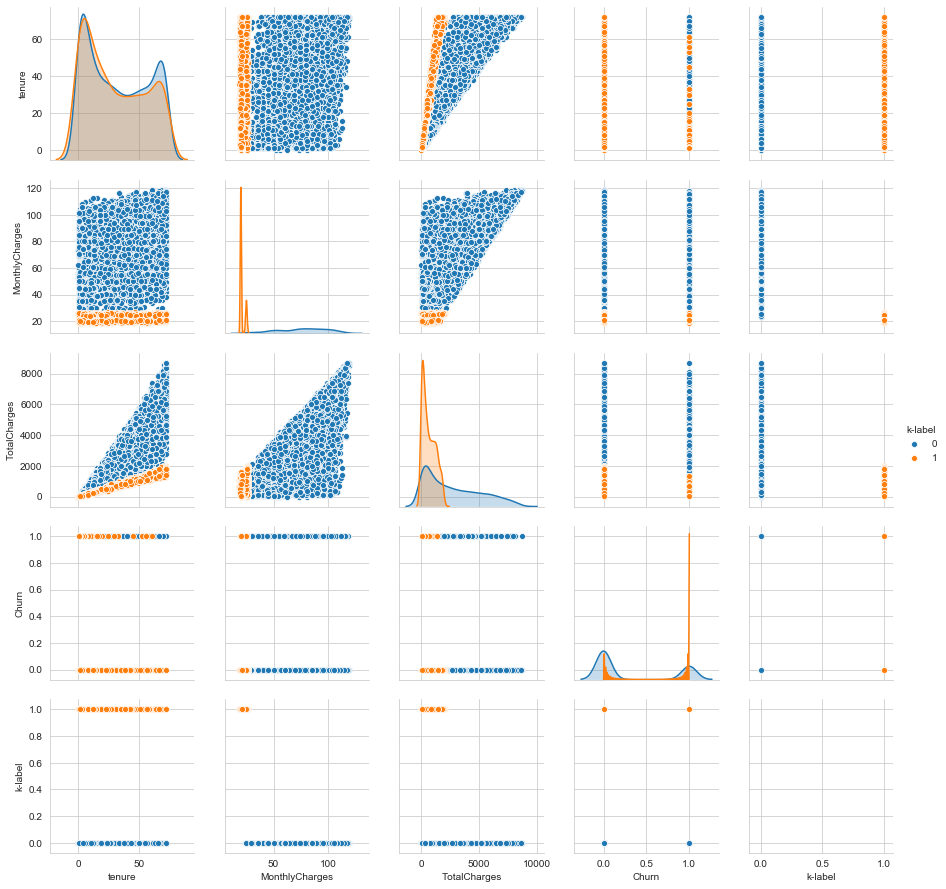

In [44]:
sns.pairplot(df,hue='k-label')

## Question 4
Just strictly from the plot above, What kind of insight you could find there?

#### Answer:
* Category 0 : Low charges in both monthly and total charges. Similar length of tenure to Category 1 and can churn or not churn but usually churn. Could be said as the Testers.
* Category 1 : Varied length of tenure, monthly charges, total charges and can churn or not churn. The Average or Usual or the Loyal Customer. Usually not churned especially those with longer tenure.
The majority of customers are in the Category 1. Which means most customers are possibly can be loyal customer if they can stay for longer tenure. This is why Telecom must give incentives to influence the customers to commit to longer tenure. The fact that it is found a Tester category means that the interest for new customers is there. Needed new strategy to turn these Tester customers to Loyal customers.

### Supervised Modelling

First, done the Train Test Split by using random_state=101 and test size =0.2

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(scaled, 
                                                    df['Churn'], test_size=0.2, 
                                                    random_state=101)

If you remember, we have a case of data imbalance for our Churn feature. We could use SMOTE to try oversampling our data. In this time try use SMOTE to our x_train data but keep it in new variable so we would have 2 different kind of x_train; with and without oversampling.

In [51]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'minority')

oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train,y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)

The Normal X_train data

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 240 to 4959
Data columns (total 30 columns):
tenure                                   5634 non-null float64
MonthlyCharges                           5634 non-null float64
TotalCharges                             5634 non-null float64
gender_Male                              5634 non-null float64
SeniorCitizen_Yes                        5634 non-null float64
Partner_Yes                              5634 non-null float64
Dependents_Yes                           5634 non-null float64
PhoneService_Yes                         5634 non-null float64
MultipleLines_No phone service           5634 non-null float64
MultipleLines_Yes                        5634 non-null float64
InternetService_Fiber optic              5634 non-null float64
InternetService_No                       5634 non-null float64
OnlineSecurity_No internet service       5634 non-null float64
OnlineSecurity_Yes                       5634 non-null float64
OnlineBac

The oversampled X_train data

In [53]:
oversampled_trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 30 columns):
tenure                                   8296 non-null float64
MonthlyCharges                           8296 non-null float64
TotalCharges                             8296 non-null float64
gender_Male                              8296 non-null float64
SeniorCitizen_Yes                        8296 non-null float64
Partner_Yes                              8296 non-null float64
Dependents_Yes                           8296 non-null float64
PhoneService_Yes                         8296 non-null float64
MultipleLines_No phone service           8296 non-null float64
MultipleLines_Yes                        8296 non-null float64
InternetService_Fiber optic              8296 non-null float64
InternetService_No                       8296 non-null float64
OnlineSecurity_No internet service       8296 non-null float64
OnlineSecurity_Yes                       8296 non-null float64
OnlineBacku

## Question 5

This time, I would leave the supervised modelling for the Churn feature to be up to you. I would give some criteria that was necessary to get the maximum points. The criteria included:

1. Aim for one of the metric of your choice (either the performance metrics optimization such as increasing the Accuracy, or lowering the loss function such as Log Loss). Give me your reason why you choose these metric. Just aim for one metric, you do not need to try optimize everything.

2. Compare 3 supervise model of your choice. Try to optimize your metric for these 3 model by hyperparameter tuning and use it on both the oversampled data and normal one. Compare the model if there is a difference If you use the oversampled data or not. Then choose to work with the data that you think is the best. If you feel the model of your choice could not be optimized again, then choose the best model with the best hyperparameter. You do not need to really aim for the best model, but I want to see if you know the step of optimizing model and done hyperparameter tuning. We do not need to work on Feature Engineering for this time.

3. From your choice of model and data, use the Feature Importance method to see which feature that affecting the Churn feature. Explain what is your finding. There might be some randomness because of the method, but just try to explain from what the plot is showing. 

4. Lastly, try to see if your model stable or not by using the K-Fold and CV method, as well as to try find the best training size by using the learning curve method. Use all your data again (the data you use for train test split).It does not matter if you model work is based on the oversampled data or not, just use the model base on the complete data (Once again, (the data you use for train test split).

#### Question 5.1

1. Aim for one of the metric of your choice (either the performance metrics optimization such as increasing the Accuracy, or lowering the loss function such as Log Loss). Give me your reason why you choose these metric. Just aim for one metric, you do not need to try optimize everything.

In [143]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, f1_score, log_loss, matthews_corrcoef
def calc_train_error(X_train, y_train, model):
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average ='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:, 1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    model.fit(X_test, y_test)
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average ='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

In [55]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
log_model = LogisticRegression()
xgb = XGBClassifier(random_state=101)
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier(random_state=101)
knn = KNeighborsClassifier()

##### Logistic Regression

In [56]:
calc_train_error(X_train, y_train, log_model)

{'report': '              precision    recall  f1-score   support\n\n           0       0.85      0.90      0.87      4148\n           1       0.66      0.56      0.61      1486\n\n    accuracy                           0.81      5634\n   macro avg       0.76      0.73      0.74      5634\nweighted avg       0.80      0.81      0.80      5634\n',
 'matthew': 0.4858972141613549,
 'f1': 0.740947939380752,
 'roc': 0.8507405505061059,
 'accuracy': 0.8090166844160455,
 'confusion': array([[3723,  425],
        [ 651,  835]], dtype=int64),
 'logloss': 0.41022501648012716}

In [57]:
calc_validation_error(X_test, y_test, log_model)

{'report': '              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.86      1026\n           1       0.65      0.53      0.59       383\n\n    accuracy                           0.80      1409\n   macro avg       0.74      0.71      0.73      1409\nweighted avg       0.79      0.80      0.79      1409\n',
 'matthew': 0.45636471953548396,
 'f1': 0.725242939322045,
 'roc': 0.8461120526875646,
 'accuracy': 0.7955997161107168,
 'confusion': array([[917, 109],
        [179, 204]], dtype=int64),
 'logloss': 0.42020586830117884}

##### XGBoost

In [58]:
calc_train_error(X_train, y_train, xgb)

{'report': '              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96      4148\n           1       0.92      0.87      0.89      1486\n\n    accuracy                           0.94      5634\n   macro avg       0.94      0.92      0.93      5634\nweighted avg       0.94      0.94      0.94      5634\n',
 'matthew': 0.8554642215132346,
 'f1': 0.9274005654948989,
 'roc': 0.9861705879757193,
 'accuracy': 0.9446219382321619,
 'confusion': array([[4033,  115],
        [ 197, 1289]], dtype=int64),
 'logloss': 0.1943969778376791}

In [59]:
calc_validation_error(X_test, y_test, xgb)

{'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1026\n           1       0.99      0.99      0.99       383\n\n    accuracy                           0.99      1409\n   macro avg       0.99      0.99      0.99      1409\nweighted avg       0.99      0.99      0.99      1409\n',
 'matthew': 0.9838530595865552,
 'f1': 0.9919257327870261,
 'roc': 0.9998473119264656,
 'accuracy': 0.99361249112846,
 'confusion': array([[1022,    4],
        [   5,  378]], dtype=int64),
 'logloss': 0.0814008026092025}

##### Decision Tree

In [60]:
calc_train_error(X_train, y_train, dtree)

{'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4148\n           1       1.00      0.99      1.00      1486\n\n    accuracy                           1.00      5634\n   macro avg       1.00      1.00      1.00      5634\nweighted avg       1.00      1.00      1.00      5634\n',
 'matthew': 0.9954286299054147,
 'f1': 0.9977109709578527,
 'roc': 0.9999914827038862,
 'accuracy': 0.9982250621228257,
 'confusion': array([[4147,    1],
        [   9, 1477]], dtype=int64),
 'logloss': 0.002739206255324487}

In [61]:
calc_validation_error(X_test, y_test, dtree)

{'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1026\n           1       1.00      0.99      1.00       383\n\n    accuracy                           1.00      1409\n   macro avg       1.00      1.00      1.00      1409\nweighted avg       1.00      1.00      1.00      1409\n',
 'matthew': 0.9946227859698633,
 'f1': 0.9973041490084281,
 'roc': 0.9999885483944849,
 'accuracy': 0.9978708303761533,
 'confusion': array([[1026,    0],
        [   3,  380]], dtype=int64),
 'logloss': 0.0029516558434074334}

##### Random Forest

In [64]:
calc_train_error(X_train, y_train, rfc)

{'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4148\n           1       1.00      1.00      1.00      1486\n\n    accuracy                           1.00      5634\n   macro avg       1.00      1.00      1.00      5634\nweighted avg       1.00      1.00      1.00      5634\n',
 'matthew': 0.9954298622566649,
 'f1': 0.9977149311283324,
 'roc': 0.999961631608935,
 'accuracy': 0.9982250621228257,
 'confusion': array([[4143,    5],
        [   5, 1481]], dtype=int64),
 'logloss': 0.11234562459300143}

In [65]:
calc_validation_error(X_test, y_test, rfc)

{'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1026\n           1       0.99      0.99      0.99       383\n\n    accuracy                           1.00      1409\n   macro avg       1.00      1.00      1.00      1409\nweighted avg       1.00      1.00      1.00      1409\n',
 'matthew': 0.9928287501463261,
 'f1': 0.996414375073163,
 'roc': 0.9999834587920338,
 'accuracy': 0.9971611071682044,
 'confusion': array([[1024,    2],
        [   2,  381]], dtype=int64),
 'logloss': 0.12150698603893904}

##### K-Nearest Neighbors

In [66]:
calc_train_error(X_train, y_train, knn)

{'report': '              precision    recall  f1-score   support\n\n           0       0.87      0.91      0.89      4148\n           1       0.71      0.63      0.67      1486\n\n    accuracy                           0.83      5634\n   macro avg       0.79      0.77      0.78      5634\nweighted avg       0.83      0.83      0.83      5634\n',
 'matthew': 0.5586887242701457,
 'f1': 0.778330289140327,
 'roc': 0.8964023427918042,
 'accuracy': 0.8338658146964856,
 'confusion': array([[3759,  389],
        [ 547,  939]], dtype=int64),
 'logloss': 0.330353544906969}

In [67]:
calc_validation_error(X_test, y_test, knn)

{'report': '              precision    recall  f1-score   support\n\n           0       0.87      0.89      0.88      1026\n           1       0.69      0.65      0.67       383\n\n    accuracy                           0.82      1409\n   macro avg       0.78      0.77      0.78      1409\nweighted avg       0.82      0.82      0.82      1409\n',
 'matthew': 0.5505126017950389,
 'f1': 0.7750389938960736,
 'roc': 0.8905162892726449,
 'accuracy': 0.8246983676366217,
 'confusion': array([[912, 114],
        [133, 250]], dtype=int64),
 'logloss': 0.3403128698518149}

#### Answer 1:
It seems that Random Forest is my preferred choice to use as the model because that model has the highest.

#### Question 5.2

2. Compare 3 supervise model of your choice. Try to optimize your metric for these 3 model by hyperparameter tuning and use it on both the oversampled data and normal one. Compare the model if there is a difference If you use the oversampled data or not. Then choose to work with the data that you think is the best. If you feel the model of your choice could not be optimized again, then choose the best model with the best hyperparameter. You do not need to really aim for the best model, but I want to see if you know the step of optimizing model and done hyperparameter tuning. We do not need to work on Feature Engineering for this time.

##### My First Choice is Random Forest

In [138]:
from sklearn.model_selection import RandomizedSearchCV

In [136]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider in every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]

# Minimum number of sampled required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1,11,num=10)]

# Method of selecting samples for training each tree
bootstrap = [True,False]

# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [139]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = 3, n_jobs = -1, scoring = 'accuracy')

In [140]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [141]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 181,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [144]:
calc_train_error(X_train, y_train, RandomForestClassifier(n_estimators = 600, min_samples_split= 181, min_samples_leaf= 2,max_features= 'sqrt',max_depth= 30,bootstrap= False,random_state=101))

{'report': '              precision    recall  f1-score   support\n\n           0       0.84      0.92      0.88      4651\n           1       0.71      0.52      0.60      1688\n\n    accuracy                           0.82      6339\n   macro avg       0.78      0.72      0.74      6339\nweighted avg       0.81      0.82      0.81      6339\n',
 'matthew': 0.4971818461211169,
 'f1': 0.7415228064558512,
 'roc': 0.8729074978524723,
 'accuracy': 0.8168480832938949,
 'confusion': array([[4300,  351],
        [ 810,  878]], dtype=int64),
 'logloss': 0.3907150957261363}

In [145]:
calc_train_error(oversampled_trainX, oversampled_trainY, RandomForestClassifier(n_estimators = 600, min_samples_split= 181, min_samples_leaf= 2,max_features= 'sqrt',max_depth= 30,bootstrap= False,random_state=101))

{'report': '              precision    recall  f1-score   support\n\n           0       0.85      0.81      0.83      4148\n           1       0.82      0.86      0.84      4148\n\n    accuracy                           0.84      8296\n   macro avg       0.84      0.84      0.84      8296\nweighted avg       0.84      0.84      0.84      8296\n',
 'matthew': 0.6729295512782205,
 'f1': 0.8359683230165117,
 'roc': 0.9166507322137796,
 'accuracy': 0.8360655737704918,
 'confusion': array([[3367,  781],
        [ 579, 3569]], dtype=int64),
 'logloss': 0.3865325628820621}

Using Randomized Search CV to find the best hyperparameter, it seems that the model got worse in terms of accuracy, using oversampled data actually increase the accuracy of the model a little. I know that I have to use Grid Search CV but my laptop takes a long time to run Grid Search thus I avoid using it because the constraint of time.

##### My Second Choice is Decision Tree:

In [146]:
# Number of features to consider in every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]

# Minimum number of sampled required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1,11,num=10)]

# Create the random grid
random_grid = {'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [147]:
dtree_random = RandomizedSearchCV(estimator = dtree, param_distributions = random_grid, n_iter = 10, cv = 3, n_jobs = -1, scoring = 'accuracy')

In [148]:
dtree_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [149]:
dtree_random.best_params_

{'min_samples_split': 236,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80}

In [150]:
calc_train_error(X_train, y_train, DecisionTreeClassifier(min_samples_split=236,min_samples_leaf=4,max_features='sqrt',max_depth=80))

{'report': '              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.87      4651\n           1       0.64      0.52      0.58      1688\n\n    accuracy                           0.80      6339\n   macro avg       0.74      0.71      0.72      6339\nweighted avg       0.79      0.80      0.79      6339\n',
 'matthew': 0.44705322472169645,
 'f1': 0.7205553475537723,
 'roc': 0.837244143592419,
 'accuracy': 0.7952358416153967,
 'confusion': array([[4159,  492],
        [ 806,  882]], dtype=int64),
 'logloss': 0.4211467617963396}

In [151]:
calc_train_error(oversampled_trainX, oversampled_trainY, DecisionTreeClassifier(min_samples_split=236,min_samples_leaf=4,max_features='sqrt',max_depth=80))

{'report': '              precision    recall  f1-score   support\n\n           0       0.77      0.80      0.79      4148\n           1       0.79      0.77      0.78      4148\n\n    accuracy                           0.78      8296\n   macro avg       0.78      0.78      0.78      8296\nweighted avg       0.78      0.78      0.78      8296\n',
 'matthew': 0.5681003432641771,
 'f1': 0.7838038649076036,
 'roc': 0.8669196050378987,
 'accuracy': 0.7838717454194792,
 'confusion': array([[3325,  823],
        [ 970, 3178]], dtype=int64),
 'logloss': 0.4477936889006717}

Using Randomized Search CV to find the best hyperparameter, it seems that the model got worse in terms of accuracy, using oversampled data reduce the accuracy of the model a little.

##### My third choice is XGBoost

In [152]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

learning_rate = [int(x) for x in np.linspace(0.1,0.6,num=6)]

subsample= [int(x) for x in np.linspace(0.3,0.9,num=6)]

max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)

min_child_weight= [1, 2, 3, 4]

colsample_bytree= [int(x) for x in np.linspace(0.5,0.9,num=5)]

# Create the random grid
random_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'subsample': subsample, 'max_depth': max_depth, 'min_child_weight': min_child_weight, 'colsample_bytree': colsample_bytree}

In [153]:
xgb_random = RandomizedSearchCV(xgb, param_distributions = random_grid, cv = 5,n_iter=10, scoring = 'accuracy', n_jobs = -1)

In [154]:
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n...
                   param_distributions={'colsample_bytree': [0, 0, 0, 0, 0],
                                        'learning_rate': [0, 0, 0, 0, 0, 0],
                         

In [155]:
xgb_random.best_params_

{'subsample': 0,
 'n_estimators': 400,
 'min_child_weight': 1,
 'max_depth': 110,
 'learning_rate': 0,
 'colsample_bytree': 0}

In [156]:
calc_train_error(X_train, y_train, XGBClassifier(subsample=0,n_estimators=400,min_child_weight=1,max_depth=110,learning_rate=0,colsample_bytree=0,random_state=101))

invalid value encountered in double_scalars
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


{'report': '              precision    recall  f1-score   support\n\n           0       0.73      1.00      0.85      4651\n           1       0.00      0.00      0.00      1688\n\n    accuracy                           0.73      6339\n   macro avg       0.37      0.50      0.42      6339\nweighted avg       0.54      0.73      0.62      6339\n',
 'matthew': 0.0,
 'f1': 0.4232029117379436,
 'roc': 0.5,
 'accuracy': 0.7337119419466793,
 'confusion': array([[4651,    0],
        [1688,    0]], dtype=int64),
 'logloss': 0.6931471824645996}

In [157]:
calc_train_error(oversampled_trainX, oversampled_trainY,XGBClassifier(subsample=0,n_estimators=400,min_child_weight=1,max_depth=110,learning_rate=0,colsample_bytree=0,random_state=101))

invalid value encountered in double_scalars
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


{'report': '              precision    recall  f1-score   support\n\n           0       0.50      1.00      0.67      4148\n           1       0.00      0.00      0.00      4148\n\n    accuracy                           0.50      8296\n   macro avg       0.25      0.50      0.33      8296\nweighted avg       0.25      0.50      0.33      8296\n',
 'matthew': 0.0,
 'f1': 0.3333333333333333,
 'roc': 0.5,
 'accuracy': 0.5,
 'confusion': array([[4148,    0],
        [4148,    0]], dtype=int64),
 'logloss': 0.6931471824645996}

Using Randomized Search CV to find the best hyperparameter, it seems that the model got worse in terms of accuracy, using oversampled data reduced the accuracy.

##### Answer 2:
It seems that oversampling data didn't make a big difference in the model. I won't use oversampled data because inconsistent result found in model in terms of accuracy and to avoid bias. I understand the use of hyperparameter to increase the effectiveness of my model but I will use the default model hyperparameter because it worked best for this data.

##### Question 5.3:
3. From your choice of model and data, use the Feature Importance method to see which feature that affecting the Churn feature. Explain what is your finding. There might be some randomness because of the method, but just try to explain from what the plot is showing. 

In [158]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

In [160]:
rfc.fit(X_train,y_train)

perm = PermutationImportance(rfc, scoring = 'accuracy', random_state=101).fit(X_test,y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1251 ± 0.0108,tenure
0.0889 ± 0.0081,MonthlyCharges
0.0881 ± 0.0091,InternetService_Fiber optic
0.0873 ± 0.0031,TotalCharges
0.0637 ± 0.0103,PaymentMethod_Electronic check
0.0556 ± 0.0032,PaperlessBilling_Yes
0.0396 ± 0.0040,TechSupport_Yes
0.0382 ± 0.0067,OnlineSecurity_Yes
0.0363 ± 0.0049,Contract_Two year
0.0321 ± 0.0044,OnlineBackup_Yes


Top 5 reasons why customers churn: Length of tenure, Charges(Monthly), Fiber Optic Internet Service, Charges (Total) and Payment method using Electronic Check.

In [161]:
import shap

In [162]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [163]:
X_test.iloc[0]

tenure                                   1.572981
MonthlyCharges                           1.186134
TotalCharges                             2.152958
gender_Male                             -1.009559
SeniorCitizen_Yes                       -0.439916
Partner_Yes                              1.034530
Dependents_Yes                           1.529024
PhoneService_Yes                         0.327438
MultipleLines_No phone service          -0.327438
MultipleLines_Yes                        1.170719
InternetService_Fiber optic              1.129102
InternetService_No                      -0.525927
OnlineSecurity_No internet service      -0.525927
OnlineSecurity_Yes                       1.577454
OnlineBackup_No internet service        -0.525927
OnlineBackup_Yes                        -0.725563
DeviceProtection_No internet service    -0.525927
DeviceProtection_Yes                     1.381277
TechSupport_No internet service         -0.525927
TechSupport_Yes                          1.563872


In [164]:
y_test.iloc[0]

0

In [165]:
rfc.predict_proba(np.array(X_test.iloc[0]).reshape(1,-1))

array([[0.95, 0.05]])

In [166]:
explainer = shap.TreeExplainer(model = rfc)
shap_val = explainer.shap_values(X_test.iloc[0])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [167]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_val[0], X_test.iloc[0])

Why customer 0 didn't churn: long tenure (in two year contract), charges were low, has Tech Support and has Online security.

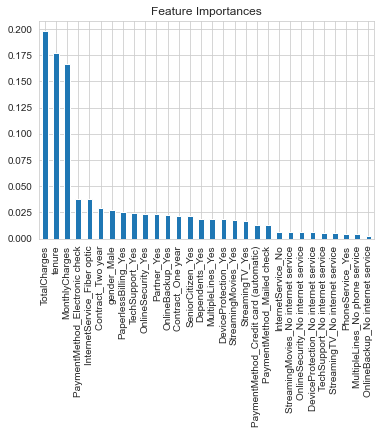

In [168]:
coef1 = pd.Series(rfc.feature_importances_,scaled.columns).sort_values(ascending=False)

coef1.plot(kind="bar",title="Feature Importances")

##### Answer 3:
It seems that feature importances show that charges(monthly and total),length of tenure, internet service type(fiber optic) and electronic check payment method affected the most whether customer will churn or not. Very Interesting. TeleCom can reduce the charges or give discount to influence the customers to stay for longer tenure, the Electronic Check seems to caused customers to churn perhaps it is to late payment via electronic check? TeleCom must check and also the Fiber Optic needs to be improved massively. There are other reasons for customers to churn and you can see in the bar graph above.

##### Question 5.4:

4. Lastly, try to see if your model stable or not by using the K-Fold and CV method, as well as to try find the best training size by using the learning curve method. Use all your data again (the data you use for train test split).It does not matter if you model work is based on the oversampled data or not, just use the model base on the complete data (Once again, (the data you use for train test split).

In [169]:
data = scaled
target = df['Churn']

In [170]:
from sklearn.model_selection import KFold
K = 10
kf =KFold(n_splits = K, shuffle = True, random_state = 101)

In [171]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average ='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:, 1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average ='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [172]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    #split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    dtree=dtree = DecisionTreeClassifier()
    
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, rfc)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [173]:
for i, tr_err, val_err in zip(range(1,11,1), train_errors, validation_errors):
    print(f'Report Train ke {i} :')
    print(tr_err['report'])
    print(f'Report Validation ke {i} :')
    print(val_err['report'])

Report Train ke 1 :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4669
           1       1.00      1.00      1.00      1669

    accuracy                           1.00      6338
   macro avg       1.00      1.00      1.00      6338
weighted avg       1.00      1.00      1.00      6338

Report Validation ke 1 :
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       505
           1       0.62      0.45      0.52       200

    accuracy                           0.77       705
   macro avg       0.71      0.67      0.68       705
weighted avg       0.75      0.77      0.75       705

Report Train ke 2 :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4652
           1       1.00      1.00      1.00      1686

    accuracy                           1.00      6338
   macro avg       1.00      1.00      1.00      6338
weighted 

In [174]:
matrix = []
for i, j in zip(train_errors, validation_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'],
                   j['roc'], i['f1'], j['f1'], i['matthew'], j['matthew'], i['logloss'], j['logloss']])
calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 
                                              'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 
                                'Test F1 Score', 'Train Matthews Corr Coef',
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())
    
average_mat = pd.DataFrame(average).T
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 
                                'Test F1 Score', 'Train Matthews Corr Coef',
                       'Test Matthews Corr Coef' , 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')    
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation 

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.997476,0.767376,0.999924,0.813832,0.996747,0.684705,0.993493,0.383601,0.113263,0.511965
2 Iteration,0.998264,0.787234,0.999960,0.805095,0.997777,0.682432,0.995555,0.388125,0.113251,0.677457
3 Iteration,0.997476,0.795745,0.999941,0.839549,0.996766,0.720946,0.993533,0.445712,0.114901,0.546944
4 Iteration,0.997634,0.815341,0.999899,0.847275,0.996958,0.753788,0.993916,0.512688,0.114114,0.502654
5 Iteration,0.997476,0.799716,0.999842,0.852946,0.996746,0.721549,0.993491,0.467668,0.114901,0.458370
6 Iteration,0.997160,0.794034,0.999933,0.813453,0.996372,0.700792,0.992744,0.412200,0.114474,0.491265
7 Iteration,0.997476,0.772727,0.999926,0.797819,0.996769,0.673575,0.993538,0.358328,0.113515,0.567863
8 Iteration,0.997476,0.809659,0.999875,0.839924,0.996767,0.739158,0.993535,0.484212,0.114138,0.510671
9 Iteration,0.997949,0.809659,0.999942,0.833590,0.997374,0.738095,0.994749,0.480797,0.114782,0.432438
10 Iteration,0.997634,0.789773,0.999889,0.800218,0.996973,0.700735,0.993946,0.410391,0.113832,0.551383


[[0.99905333 0.99905333 0.99936889 0.99936889 0.99968444 0.99968444
  0.99968444 0.99968444 0.99968444 0.99968444]
 [0.99848523 0.99823277 0.99873769 0.99848523 0.99848523 0.99949508
  0.99924262 0.99924262 0.99924262 0.99924262]
 [0.99831685 0.99810646 0.99810646 0.99789607 0.99789607 0.99873764
  0.99831685 0.99810646 0.99810646 0.99810646]
 [0.99765555 0.9974752  0.9974752  0.99729486 0.99765555 0.99801623
  0.99783589 0.99783589 0.99765555 0.99765555]
 [0.9977911  0.99747554 0.99747554 0.99731777 0.99763332 0.99810666
  0.99747554 0.99763332 0.9977911  0.99747554]]
[0.99949511 0.99888917 0.99816958 0.99765555 0.99761754]
[3169 3961 4753 5545 6338]


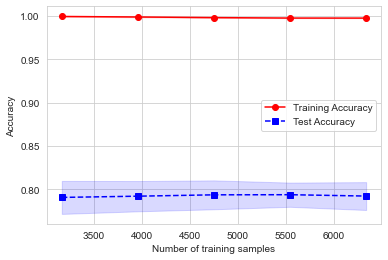

In [175]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rfc,
                                                       X=data,
                                                       y=target,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Answer 4:

Random Forest as the model used is stable for both training and accuracy. The accuracy of this model almost reached 0.8 thus I assume that this model is good enough to be used for TeleCom customer data. GridSearchCV can be used to find the very best model.

### Conclusion:
Telecom customers data exploration highlights several key factors that can be improved to avoid customers churn such as charges (perhaps it is too high), longer tenure customers also less likely to churn (customers must be influenced to commit to longer tenure), the Fiber Optic Internet Service also caused customers to churn (a big improvement needed) and Electronic Check payment method also caused customers to churn (perhaps it is easier to be late in payment via Electronic Check, improvement needed). The model used to predict whether customer will churn or not is Random Forest with the accuracy of almost 80% (average 79%). This model can be improved upon via Grid Search.